 Dataset Shapes:
Sri Lanka: (800, 13)
Foreign:   (207, 13)

 Missing Values:
Sri Lanka:
 Hb              0
RBC             0
MCV             0
MCHC            0
MCH             0
HCT             0
RDW-CV          0
BP              0
Cholesterol     0
Diabetes        0
Gender          0
Age             0
Heartdisease    0
dtype: int64

Foreign:
 Hb              0
RBC             0
MCV             0
MCHC            0
MCH             0
HCT             0
RDW-CV          0
BP              0
Cholesterol     0
Diabetes        0
Gender          0
Age             0
Heartdisease    0
dtype: int64

 Summary Statistics (Sri Lanka):
               Hb        RBC         MCV        MCHC         MCH         HCT  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean    11.333375    4.02165   85.701712   33.049250   28.302375   34.367437   
std      2.118610    0.72514    8.116225    3.039428    3.075423    5.972002   
min      2.400000    0.92000    1.770000   25.500000

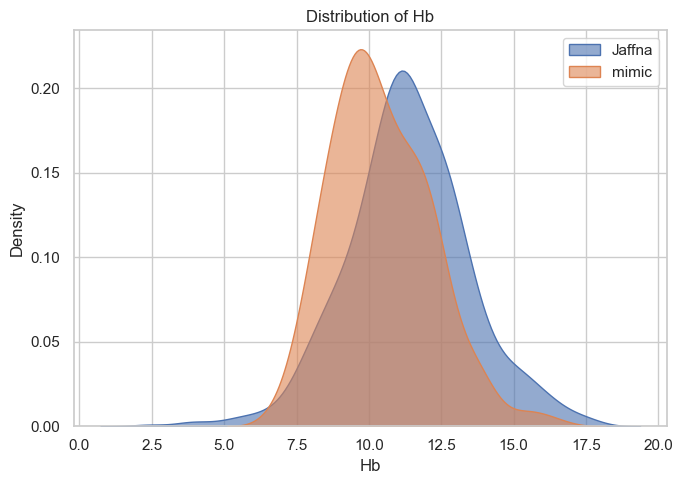

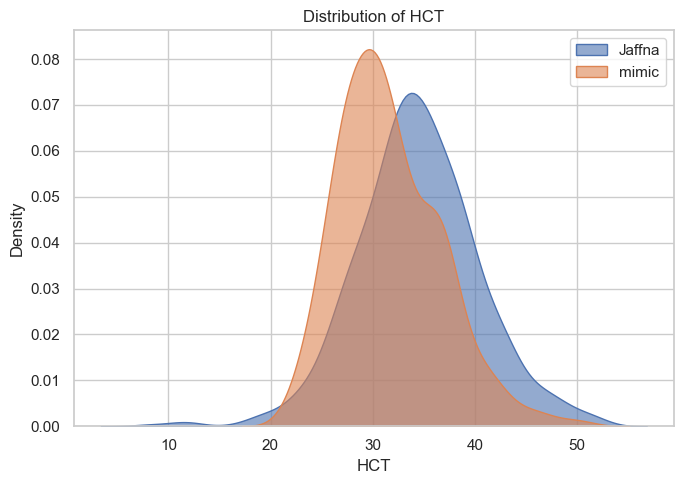

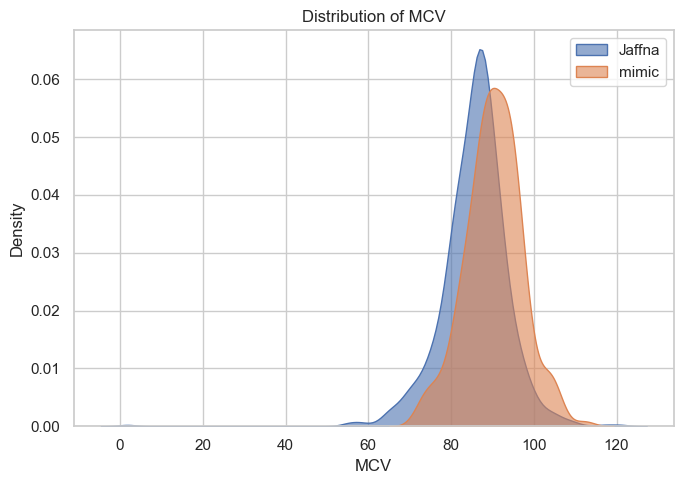

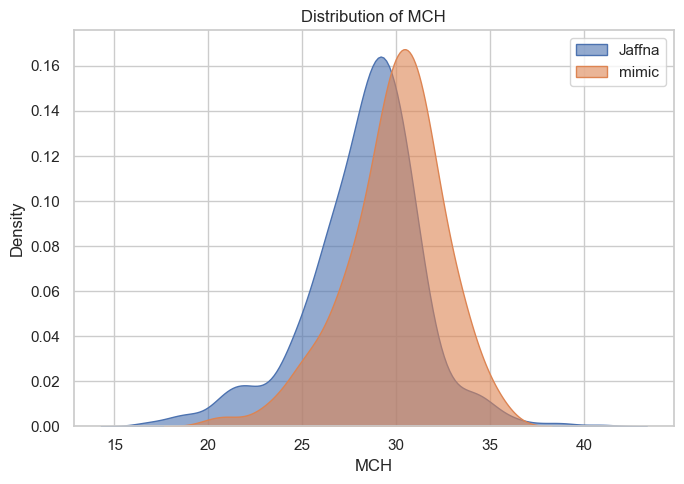

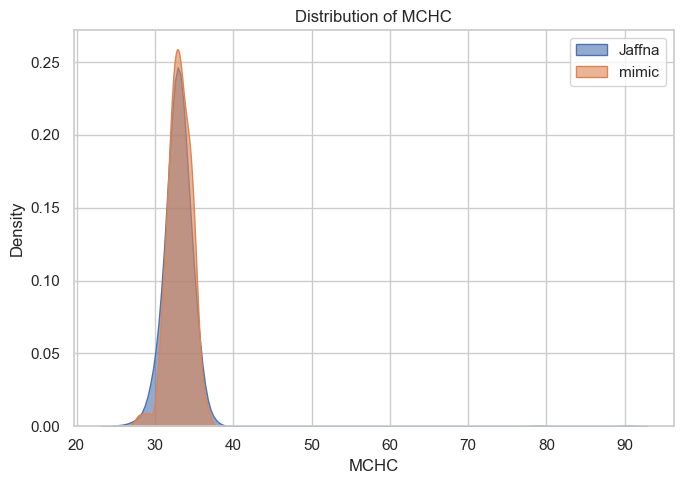

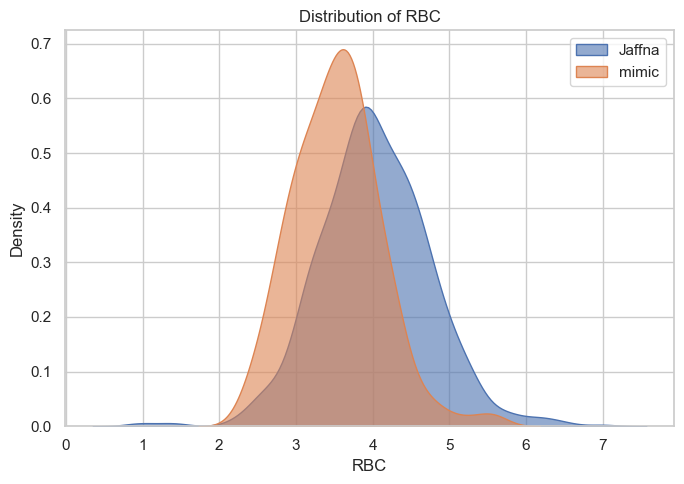

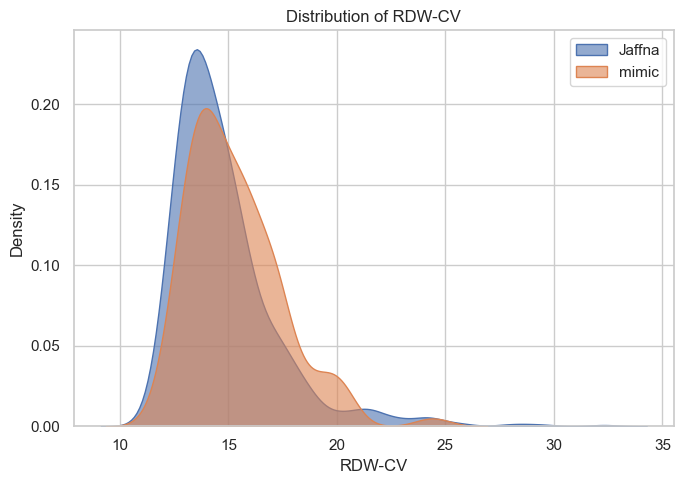

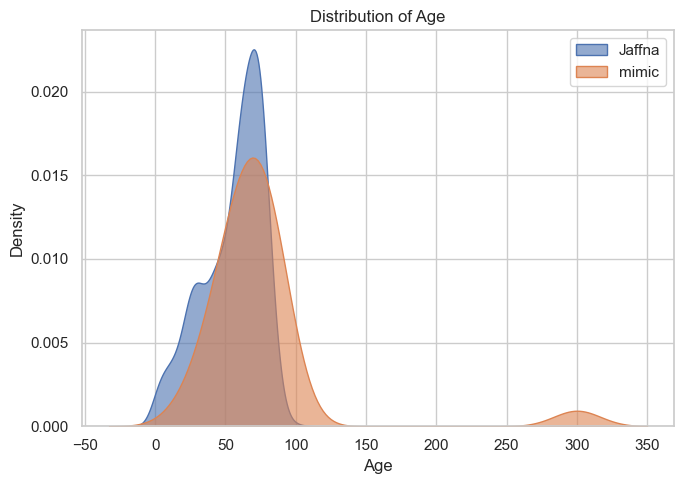


===== T-Test Comparison for Heartdisease = 0 =====
Hb: t-stat = 5.345, p-value = 0.0000 →  Significant


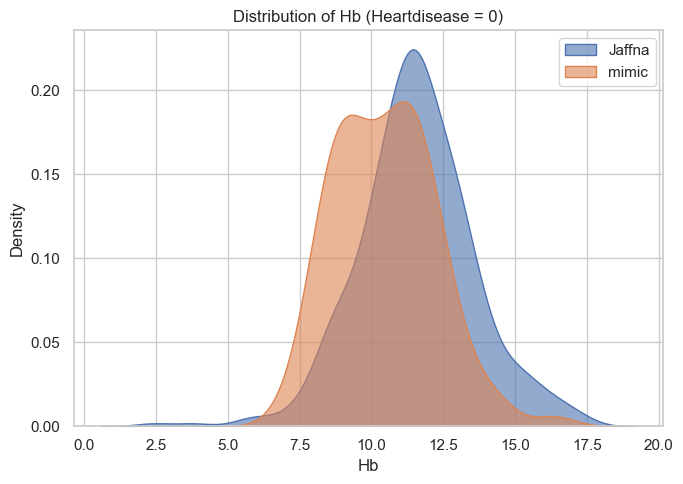

HCT: t-stat = 5.612, p-value = 0.0000 →  Significant


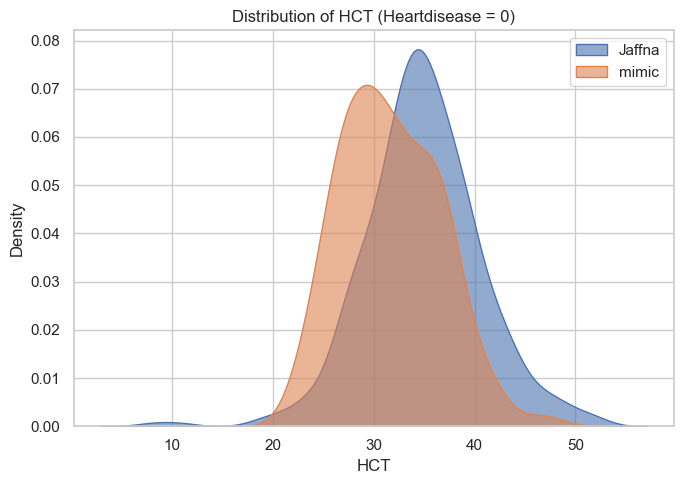

MCV: t-stat = -7.181, p-value = 0.0000 →  Significant


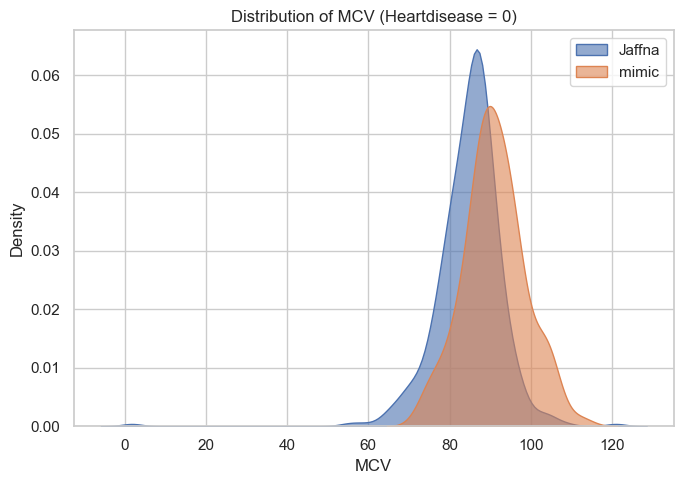

MCH: t-stat = -6.326, p-value = 0.0000 →  Significant


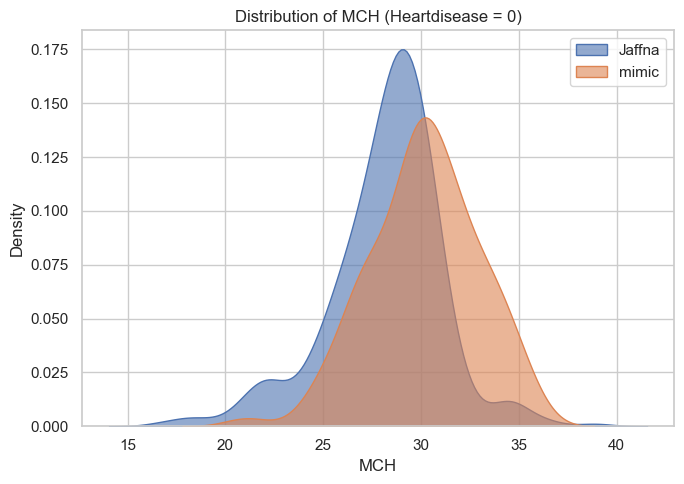

MCHC: t-stat = 0.406, p-value = 0.6853 →  Not Significant


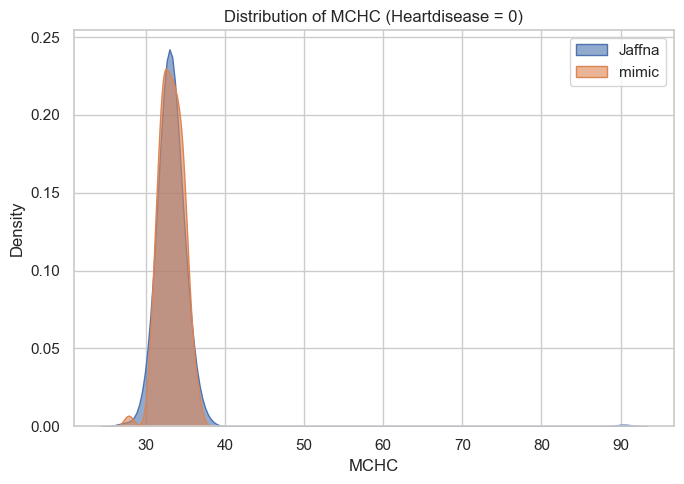

RBC: t-stat = 9.445, p-value = 0.0000 →  Significant


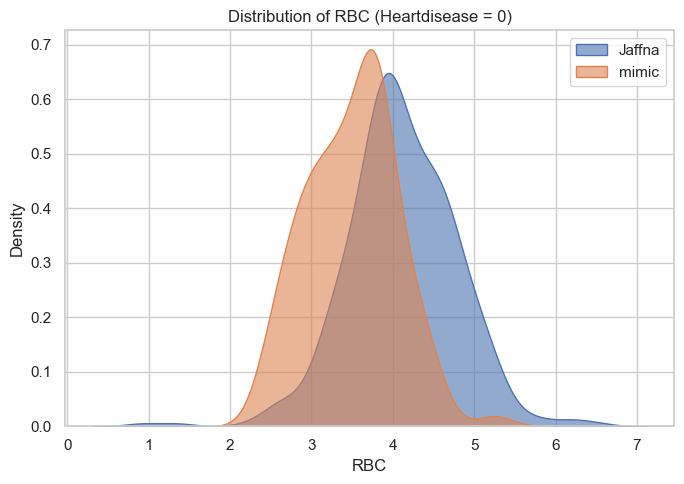

RDW-CV: t-stat = -3.849, p-value = 0.0002 →  Significant


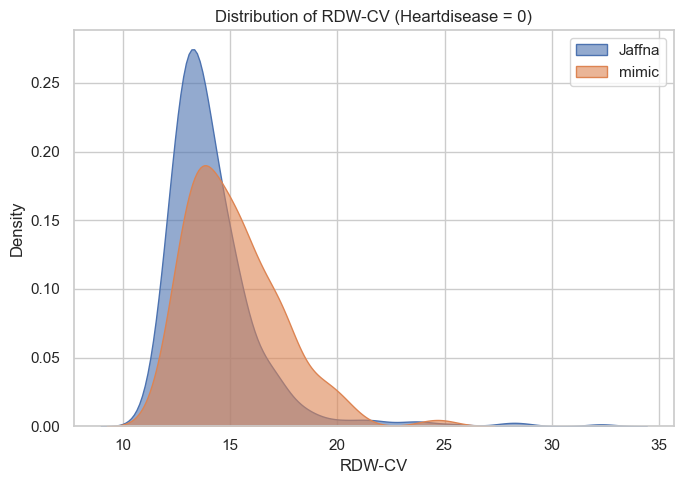

Age: t-stat = -5.907, p-value = 0.0000 →  Significant


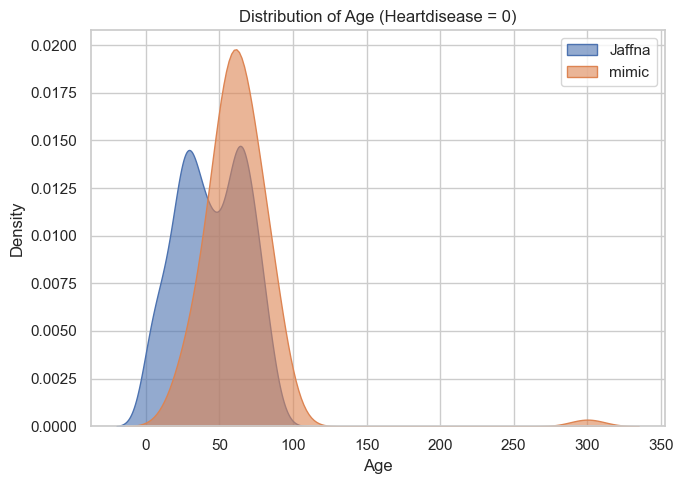


 Summary Table:
Feature  t-stat  p-value     Significance
     Hb   5.345   0.0000      Significant
    HCT   5.612   0.0000      Significant
    MCV  -7.181   0.0000      Significant
    MCH  -6.326   0.0000      Significant
    RBC   9.445   0.0000      Significant
    Age  -5.907   0.0000      Significant
 RDW-CV  -3.849   0.0002      Significant
   MCHC   0.406   0.6853  Not Significant

===== T-Test Comparison for Heartdisease = 1 =====
Hb: t-stat = 3.736, p-value = 0.0002 →  Significant


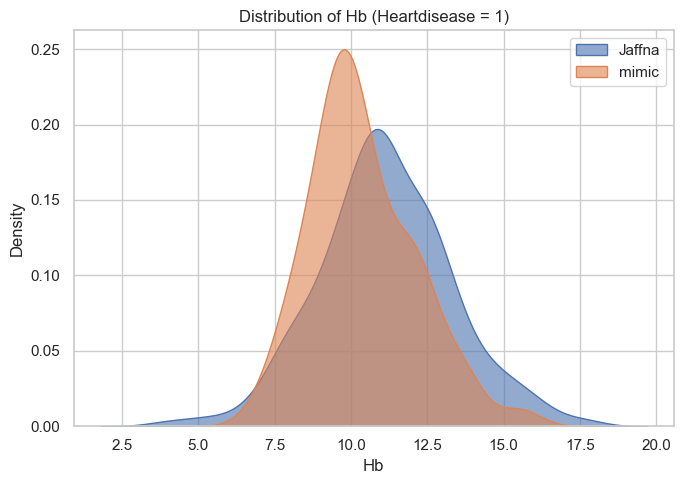

HCT: t-stat = 4.000, p-value = 0.0001 →  Significant


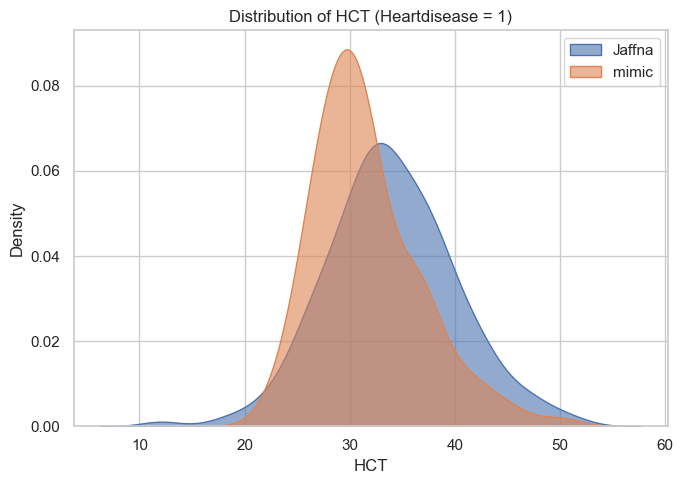

MCV: t-stat = -4.320, p-value = 0.0000 →  Significant


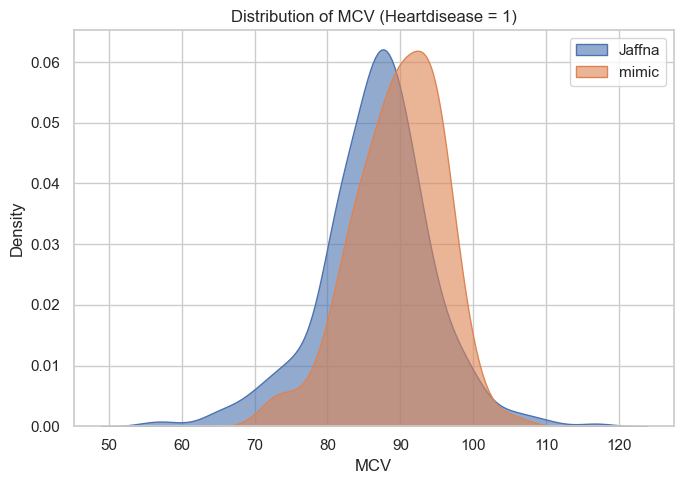

MCH: t-stat = -4.306, p-value = 0.0000 →  Significant


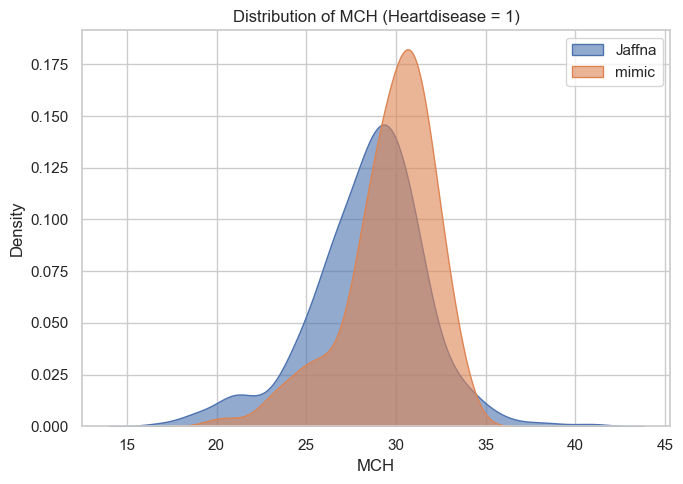

MCHC: t-stat = -1.269, p-value = 0.2055 →  Not Significant


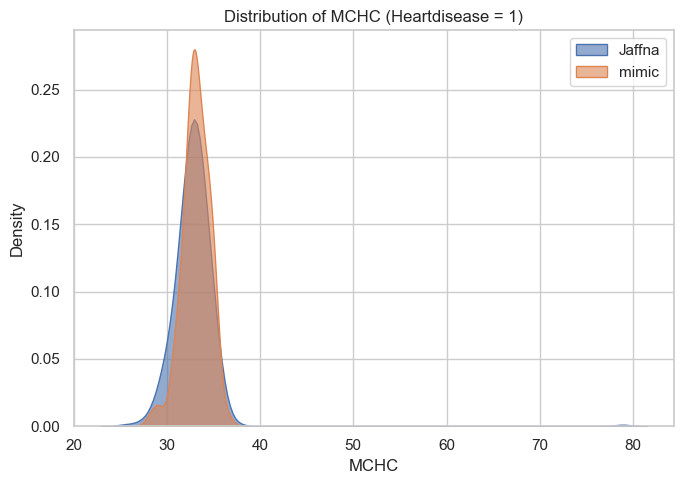

RBC: t-stat = 5.483, p-value = 0.0000 →  Significant


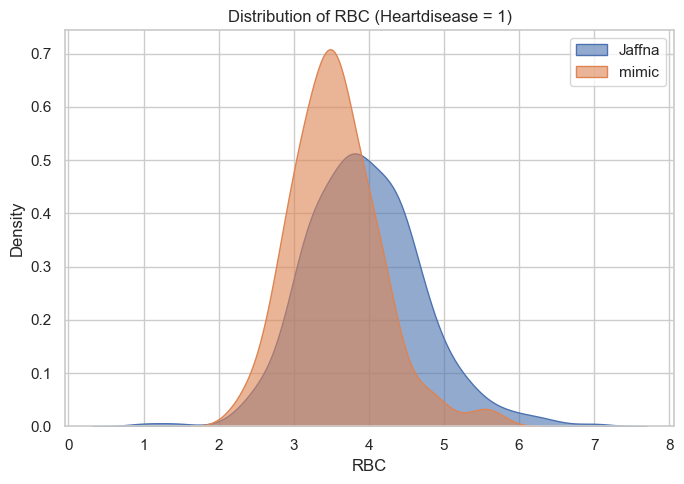

RDW-CV: t-stat = 0.110, p-value = 0.9126 →  Not Significant


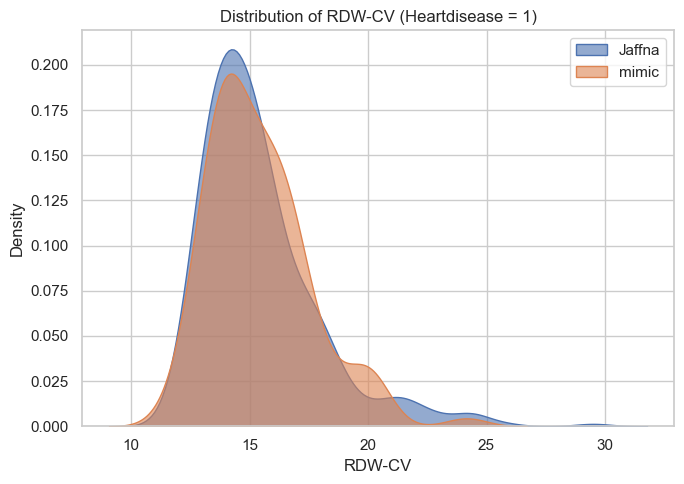

Age: t-stat = -3.480, p-value = 0.0007 →  Significant


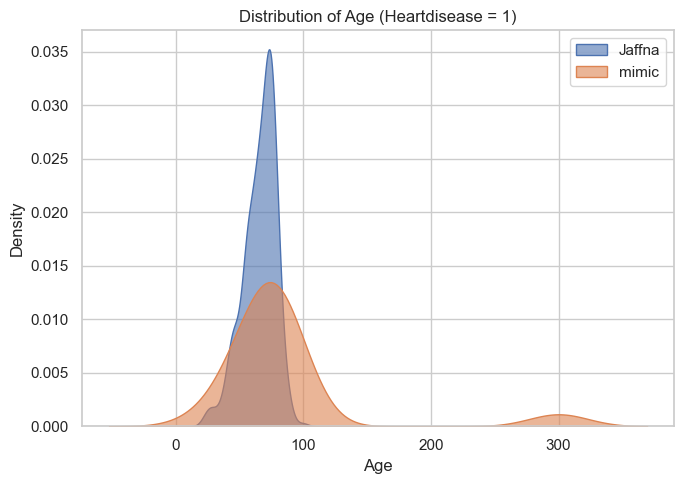


 Summary Table:
Feature  t-stat  p-value     Significance
    MCV  -4.320   0.0000      Significant
    MCH  -4.306   0.0000      Significant
    RBC   5.483   0.0000      Significant
    HCT   4.000   0.0001      Significant
     Hb   3.736   0.0002      Significant
    Age  -3.480   0.0007      Significant
   MCHC  -1.269   0.2055  Not Significant
 RDW-CV   0.110   0.9126  Not Significant


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


sns.set(style="whitegrid")


data_lk = pd.read_csv("actualdata.csv")
data_foreign = pd.read_csv("mimic_dataset.csv")


data_lk = data_lk.dropna(subset=['Heartdisease'])
data_foreign = data_foreign.dropna(subset=['Heartdisease'])


print(" Dataset Shapes:")
print(f"Sri Lanka: {data_lk.shape}")
print(f"Foreign:   {data_foreign.shape}")

print("\n Missing Values:")
print("Sri Lanka:\n", data_lk.isnull().sum())
print("\nForeign:\n", data_foreign.isnull().sum())

# ========== 2. SUMMARY STATISTICS ==========
print("\n Summary Statistics (Sri Lanka):")
print(data_lk.describe())

print("\n Summary Statistics (Foreign):")
print(data_foreign.describe())

# ========== 3. CATEGORICAL DISTRIBUTIONS ==========
cat_cols = ['Gender', 'BP', 'Cholesterol', 'Diabetes', 'Anemia', 'Anemia_Severity', 'Heartdisease']

for col in cat_cols:
    if col in data_lk.columns and col in data_foreign.columns:
        print(f"\n {col} Distribution (Sri Lanka):")
        print(data_lk[col].value_counts(normalize=True).round(3))

        print(f"\n {col} Distribution (Foreign):")
        print(data_foreign[col].value_counts(normalize=True).round(3))

# ========== 4. NUMERIC FEATURE DISTRIBUTIONS ==========
num_cols = ['Hb', 'HCT', 'MCV', 'MCH', 'MCHC', 'RBC', 'RDW-CV', 'Age']

for col in num_cols:
    if col in data_lk.columns and col in data_foreign.columns:
        plt.figure(figsize=(7, 5))
        sns.kdeplot(data=data_lk, x=col, label='Jaffna', fill=True, alpha=0.6)
        sns.kdeplot(data=data_foreign, x=col, label='mimic', fill=True, alpha=0.6)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ========== 5. T-TEST & PLOTS FOR HEARTDISEASE GROUPS ==========
for hd_status in [0, 1]:
    print(f"\n===== T-Test Comparison for Heartdisease = {hd_status} =====")
    ttest_results = []

    for col in num_cols:
        if col in data_lk.columns and col in data_foreign.columns:
            # Filter values by heart disease status
            sl_values = data_lk[data_lk['Heartdisease'] == hd_status][col].dropna()
            fr_values = data_foreign[data_foreign['Heartdisease'] == hd_status][col].dropna()

            # Check if enough data points exist for t-test
            if len(sl_values) > 1 and len(fr_values) > 1:
                stat, p = ttest_ind(sl_values, fr_values, equal_var=False)  # Welch's t-test
                significance = ' Significant' if p < 0.05 else ' Not Significant'

                print(f"{col}: t-stat = {stat:.3f}, p-value = {p:.4f} → {significance}")

                ttest_results.append({
                    'Feature': col,
                    't-stat': round(stat, 3),
                    'p-value': round(p, 4),
                    'Significance': significance
                })

                # Plot KDEs side-by-side for the group
                plt.figure(figsize=(7, 5))
                sns.kdeplot(sl_values, label='Jaffna', fill=True, alpha=0.6)
                sns.kdeplot(fr_values, label='mimic', fill=True, alpha=0.6)
                plt.title(f"Distribution of {col} (Heartdisease = {hd_status})")
                plt.xlabel(col)
                plt.ylabel("Density")
                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()
            else:
                print(f"{col}: Not enough data for Heartdisease = {hd_status} in one or both groups.")

    # Summary table for the current Heartdisease group
    summary_df = pd.DataFrame(ttest_results).sort_values(by='p-value')
    print("\n Summary Table:")
    print(summary_df.to_string(index=False))
